# Creating Node Representations with DeepWalk

## Node Embedding

Re-visit a layer of a simple GNN figure mentioned in [A Gentle Introduction to Graph Neural Networks](https://gta-lab.github.io/gnn-intro/):

![](img/arch_gcn.40871750.png)

A single layer of a simple GNN. A graph is the input, and each component (V,E,U) gets updated by a MLP to produce a new graph. Each function subscript indicates a separate function for a different graph attribute at the n-th layer of a GNN model.

The goal of node embedding is encoding nodes so that similarity in the embedding space (e.g., dot product) approximates similarity in the original network.

See:

- [Johnson–Lindenstrauss lemma, at Foundations of Data Science course of FUM](https://fum-cs.github.io/fds/ADS/):
    > The Johnson-Lindenstrauss lemma states that if the data points lie in a very high-dimensional space, then projecting such points on simple random directions preserves their pairwise distances.
- Weisfeiler Leman graph isomorphism test in [How Powerful are Graph Neural Networks?](https://arxiv.org/pdf/1810.00826),  ICLR 2019, by: Keyulu Xu, Weihua Hu, Jure Leskovec, Stefanie Jegelka
    > The Weisfeiler-Lehman algorithm is a powerful method to refine node labels based on neighborhood information in graphs. It serves as a foundational concept for GNNs, guiding how these networks aggregate information from their neighbors to learn better node and graph representations.

<!-- $\bm{v} \in \mathbb{R} \rightarrow \bm{z} \in \mathbb{R}^d$ -->

![](img/Node-Embedding.png)

![](img/walks-on-graphs-and-skip-gram.png)

# DeepWalk and Skip-Gram

## Random Walks
A random walk is a mathematical model that describes a path composed of a succession of random steps. In the context of graph theory, a random walk on a graph is a sequence of vertices where each vertex in the sequence is chosen randomly from the neighbors of the previous vertex.

## Skip-Gram
The skip-gram model is a popular technique in natural language processing (NLP) for learning word embeddings. It aims to learn a vector representation of each word in a corpus, such that the vectors of similar words are close to each other in the vector space. In the skip-gram model, the objective is to predict the context words (i.e., words that appear within a certain window size around a target word) given the target word.

## DeepWalk
DeepWalk is a graph embedding technique that uses random walks and the skip-gram model to learn low-dimensional representations of vertices in a graph. The key idea behind DeepWalk is to treat the sequences of vertices obtained from random walks on a graph as if they were sentences in a document, and then apply the skip-gram model to learn the vertex embeddings.

The DeepWalk algorithm consists of the following steps:

1. **Generate random walks**: For each vertex in the graph, perform multiple random walks starting from that vertex. The length of each random walk is a hyperparameter.
2. **Apply skip-gram**: Treat the sequences of vertices obtained from the random walks as "sentences" and apply the skip-gram model to learn the vertex embeddings. The objective is to predict the context vertices given a target vertex.
3. **Learn vertex embeddings**: The skip-gram model learns a vector representation for each vertex in the graph, such that vertices that appear in similar contexts (i.e., have similar neighborhoods) have similar vector representations.

The intuition behind DeepWalk is that vertices that are close in the graph (i.e., share many common neighbors) will tend to appear in similar contexts during the random walks, and thus will have similar vector representations learned by the skip-gram model.

By combining random walks and the skip-gram model, DeepWalk is able to learn low-dimensional, continuous representations of vertices that capture the structural information of the graph. These vertex embeddings can then be used as features for various graph-based tasks, such as node classification, link prediction, and graph visualization.


# Skip-Gram Model in Natural Language Processing

This following images depicts the concept of the **skip-gram model**, which is a popular technique in natural language processing (NLP) for learning word embeddings. The skip-gram model aims to learn a vector representation of each word in a corpus, such that the vectors of similar words are close to each other in the vector space.

The image shows the skip-gram model in the context of a sequence of words, where the objective is to predict the context words (i.e., words that appear within a certain window size around a target word) given the target word.

The central part of the image, labeled $ f(x) $, represents the skip-gram model, which takes the current word $ W_t $ as input and tries to predict the surrounding context words, such as $ W_{t-2} $, $ W_{t-1} $, $ W_{t+1} $, and $ W_{t+2} $.

This process can be viewed as a Markov model, where the prediction of the context words depends only on the current word and not on the entire sequence of words. The probabilities of the context words, denoted as 

$$
P(W_{t-2} | W_t), \quad P(W_{t-1} | W_t), \quad P(W_{t+1} | W_t), \quad P(W_{t+2} | W_t)
$$

are the outputs of the skip-gram model.

By training the skip-gram model on a large corpus of text, the model learns to capture the semantic and syntactic relationships between words, resulting in word embeddings that can be used as features for various NLP tasks, such as text classification, named entity recognition, and machine translation.


![](img/predict-words.jpeg)

For more information about the role of Markov Model in the learning and language models, see [Machine Learning section of Learning Theory Course at FUM](https://fum-cs.github.io/machine-learning/).

## CBOW and Skip-gram
![](img/The-CBOW-and-Skip-gram-architecture-of-word2vec.jpg)

# Getting started with Word2Vec in Gensim and making it work!

The idea behind Word2Vec is pretty simple. We are making and assumption that you can tell the meaning of a word by the company it keeps. This is analogous to the saying *show me your friends, and I'll tell who you are*. So if you have two words that have very similar neighbors (i.e. the usage context is about the same), then these words are probably quite similar in meaning or are at least highly related. 

In the following, you will learn how to use the Gensim implementation of Word2Vec and actually get it to work!

## A practical example of word embedding

Let's start with a section of *Anne of Green Gables*:

> 
> As much as she hated Gilbert, however, did she love Diana, with all the
> love of her passionate little heart, equally intense in its likes and
dislikes. One evening Marilla, coming in from the orchard with a basket
of apples, found Anne sitting along by the east window in the twilight,
crying bitterly.
> “Whatever’s the matter now, Anne?” she asked.
> “It’s about Diana,” sobbed Anne luxuriously. “I love Diana so, Marilla.
I cannot ever live without her. But I know very well when we grow up
that Diana will get married and go away and leave me. And oh, what shall
I do? I hate her husband--I just hate him furiously. I’ve been imagining
it all out--the wedding and everything--Diana dressed in snowy garments,
with a veil, and looking as beautiful and regal as a queen; and me the
bridesmaid, with a lovely dress too, and puffed sleeves, but with a
breaking heart hid beneath my smiling face. And then bidding Diana
goodbye-e-e--” Here Anne broke down entirely and wept with increasing
bitterness.
> Marilla turned quickly away to hide her twitching face; but it was no
use; she collapsed on the nearest chair and burst into such a hearty and
unusual peal of laughter that Matthew, crossing the yard outside, halted
in amazement. When had he heard Marilla laugh like that before?
> “Well, Anne Shirley,” said Marilla as soon as she could speak, “if you
must borrow trouble, for pity’s sake borrow it handier home. I should
think you had an imagination, sure enough.”

> — Lucy Maud Montgomery, *Anne of Green Gables*



![](img/Anne-Chapter-15-last-page.jpg)

## Gensim & NLTK

In [1]:
# Auto-setup when running on Google Colab
import os
if 'google.colab' in str(get_ipython()) and not os.path.exists('/content/graph-neural-networks'):
    !git clone -q https://github.com/gta-lab/graph-neural-networks.git /content/graph-neural-networks
    %cd graph-neural-networks/notebooks

In [2]:
text = """As much as she hated Gilbert, however, did she love Diana, with all the
love of her passionate little heart, equally intense in its likes and
dislikes. One evening Marilla, coming in from the orchard with a basket
of apples, found Anne sitting along by the east window in the twilight,
crying bitterly.
“Whatever’s the matter now, Anne?” she asked.
“It’s about Diana,” sobbed Anne luxuriously. “I love Diana so, Marilla.
I cannot ever live without her. But I know very well when we grow up
that Diana will get married and go away and leave me. And oh, what shall
I do? I hate her husband--I just hate him furiously. I’ve been imagining
it all out--the wedding and everything--Diana dressed in snowy garments,
with a veil, and looking as beautiful and regal as a queen; and me the
bridesmaid, with a lovely dress too, and puffed sleeves, but with a
breaking heart hid beneath my smiling face. And then bidding Diana
goodbye-e-e--” Here Anne broke down entirely and wept with increasing
bitterness.
Marilla turned quickly away to hide her twitching face; but it was no
use; she collapsed on the nearest chair and burst into such a hearty and
unusual peal of laughter that Matthew, crossing the yard outside, halted
in amazement. When had he heard Marilla laugh like that before?
“Well, Anne Shirley,” said Marilla as soon as she could speak, “if you
must borrow trouble, for pity’s sake borrow it handier home. I should
think you had an imagination, sure enough.”
""".split()

In [3]:
from gensim.models.word2vec import Word2Vec

# Create Word2Vec
model = Word2Vec([text],
                 sg=1,   # Skip-gram
                 vector_size=10,
                 min_count=0,
                 window=3)
# Train model
model.train([text],  total_words=len(text), epochs=50)

model.wv.most_similar(positive="Diana")

[('her', 0.9902161359786987),
 ('she', 0.9899694919586182),
 ('wedding', 0.988711416721344),
 ('should', 0.9884231686592102),
 ('pity’s', 0.9849447011947632),
 ('but', 0.9848229885101318),
 ('east', 0.9828867316246033),
 ('hate', 0.9828394055366516),
 ('go', 0.9821310043334961),
 ('like', 0.9820447564125061)]

Apply the model to the whole book of Anne of Green Gables

In [4]:
import numpy as np  
from gensim.models.word2vec import Word2Vec  
import string 
import io  
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords  

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mamin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
fileName = "../data/Anne_of_Green_Gables.txt"  
file = io.open(fileName, encoding='utf-8')  
book_text = file.read()  
file.close()  

text = book_text.split()

# Remove stopwords  
stop_words = set(stopwords.words('english'))  
text = [word for word in text if word.lower() not in stop_words]  
# Remove punctuation  
translator = str.maketrans('', '', string.punctuation + "'"+"”"+"“")  
text = [word.translate(translator) for word in text] 

# Create Word2Vec  
model = Word2Vec([text],  
                 sg=1,   # Skip-gram  
                 vector_size=50,  
                 min_count=1,  
                 window=5,  
                 workers=1,  
                 seed=0)  

print(f'Shape of W_embed: {model.wv.vectors.shape}')  

# Train model  
model.train([text], total_words=len(text), epochs=100)  

model.wv.most_similar(positive="Anne")

Shape of W_embed: (8920, 50)


[('Marilla', 0.8268883228302002),
 ('said', 0.6982665657997131),
 ('faltered', 0.610625684261322),
 ('horrified', 0.6060405373573303),
 ('astonishment', 0.6010062098503113),
 ('spelled', 0.5995970964431763),
 ('I', 0.5941324830055237),
 ('fiddlesticks', 0.5927588939666748),
 ('Oooh', 0.5925849080085754),
 ('unsympathetic', 0.590878427028656)]

In [6]:
model.wv.most_similar(positive="Shirley")

[('mother’s', 0.8844769597053528),
 ('Yours', 0.8692860007286072),
 ('owner', 0.8639934659004211),
 ('father’s', 0.8601971864700317),
 ('Walter', 0.8578155636787415),
 ('remain', 0.8461606502532959),
 ('Bertha', 0.8234245777130127),
 ('respectfully', 0.817496120929718),
 ('Will', 0.8153164386749268),
 ('Call', 0.810065746307373)]

# Random walk

## Karate Club Example

![](img/karate_kid_raw_img.jpg)

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
# Load dataset
G = nx.karate_club_graph()

# Process labels (Mr. Hi = 0, Officer = 1)
true_labels = np.zeros((len(G.nodes)), dtype='int')
for i, node in enumerate(G.nodes):
    label = G.nodes[node]['club']
    true_labels[i] = (1 if label == 'Officer' else 0)

print("Total number of graph nodes:", G.number_of_nodes())
print("Total number of graph edges:", G.number_of_edges())

Total number of graph nodes: 34
Total number of graph edges: 78


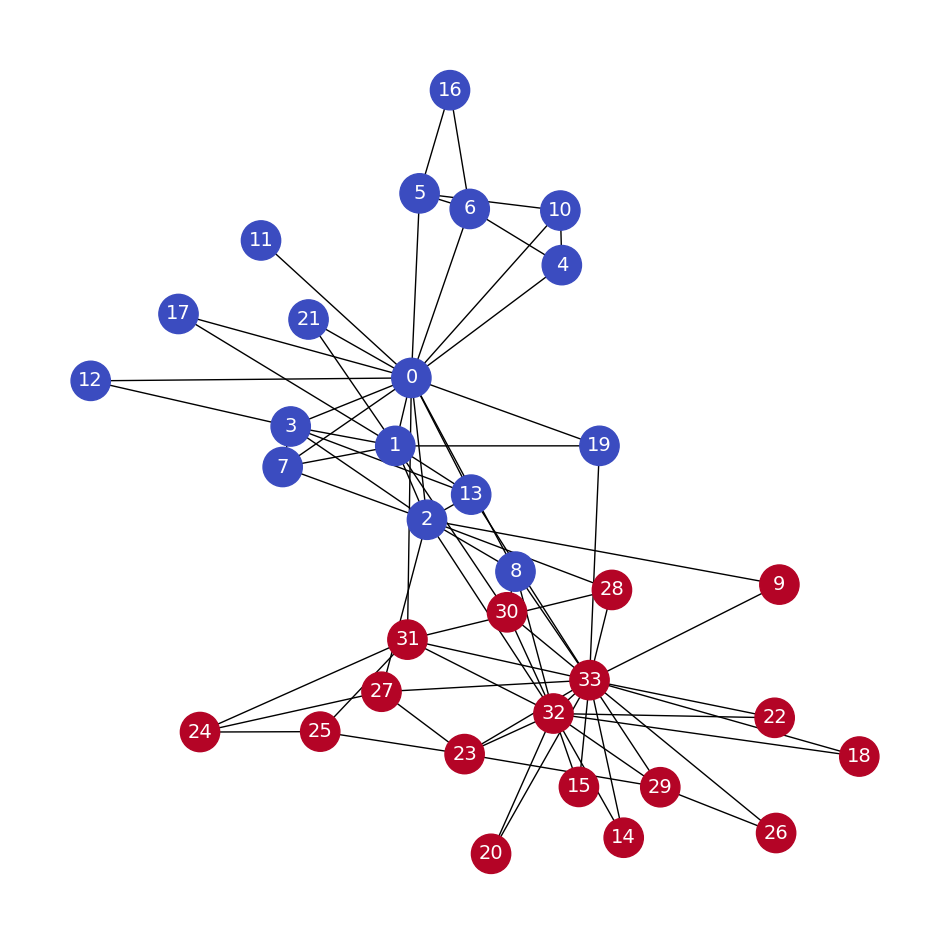

In [8]:
# Plot graph
plt.figure(figsize=(12,12))
plt.axis('off')
nx.draw_networkx(G,
                 pos=nx.spring_layout(G, seed=0),
                 node_color=true_labels,
                 node_size=800,
                 cmap='coolwarm',
                 font_size=14,
                 font_color='white'
                 )

In [9]:
# Obtain features from the adjacency matrix (or use a different method for features)
X = nx.to_numpy_array(G)
print(X)

# Create masks to train and test the model
train_mask = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]
test_mask = [0, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33]

X_train = X[train_mask]
X_test = X[test_mask]
y_train = true_labels[train_mask]
y_test = true_labels[test_mask]
# y_train

[[0. 4. 5. ... 2. 0. 0.]
 [4. 0. 6. ... 0. 0. 0.]
 [5. 6. 0. ... 0. 2. 0.]
 ...
 [2. 0. 0. ... 0. 4. 4.]
 [0. 0. 2. ... 4. 0. 5.]
 [0. 0. 0. ... 4. 5. 0.]]


## Classifications of nodes using kNN

In [10]:
from sklearn.neighbors import NearestNeighbors  
from sklearn.metrics import accuracy_score  
import numpy as np  

# Train Nearest Neighbors model  
n_neighbors = 3  
neigh = NearestNeighbors(n_neighbors=n_neighbors)  
neigh.fit(X_train)  

# Find nearest neighbors indices for X_test  
distances, indices = neigh.kneighbors(X_test)  

# Predict labels for test set based on nearest neighbors  
y_pred = np.array([np.bincount(y_train[indices[i]]).argmax() for i in range(len(indices))])  

# Evaluate accuracy  
acc = accuracy_score(y_test, y_pred)  
print(f'Accuracy = {acc * 100:.2f}%')

Accuracy = 90.91%


In [11]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_graph_with_labels(G, true_labels, predicted_labels, train_mask, test_mask, plot_title):
    # Initialize the colors for different classes
    class_0_color_train = 'blue'        # Color for class 0 training nodes
    class_1_color_train = 'red'         # Color for class 1 training nodes
    class_0_color_test = 'lightblue'    # Color for class 0 test nodes
    class_1_color_test = 'lightcoral'   # Color for class 1 test nodes
    misclassified_color = 'darkgray'    # Color for misclassified nodes

    # Prepare the color list for each node in the graph
    node_colors = []

    # Iterate through all nodes in the graph
    for node in range(G.number_of_nodes()):
        if node in train_mask:
            # Current node is a training node
            if true_labels[node] == 0:
                node_colors.append(class_0_color_train)
            else:
                node_colors.append(class_1_color_train)
        elif node in test_mask:
            # Current node is a testing node
            test_index = test_mask.index(node)
            if true_labels[node] == 0:
                if predicted_labels[test_index] == 1:  # Predicted class 1
                    node_colors.append(misclassified_color)
                else:
                    node_colors.append(class_0_color_test)
            else:
                if predicted_labels[test_index] == 0:  # Predicted class 0
                    node_colors.append(misclassified_color)
                else:
                    node_colors.append(class_1_color_test)
        else:
            # If the node is not in either mask, assign a default color (e.g., gray)
            node_colors.append('gray')

    # Create a label dictionary
    labels = {node: str(node) for node in G.nodes()}

    # Plot the graph with labeled nodes
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    pos = nx.spring_layout(G, seed=0)
    nx.draw_networkx(G,
                     pos=pos,
                     node_color=node_colors,  # Use the color list
                     node_size=800,
                     font_size=14,  # Set font size for labels
                     with_labels=True,  # Draw labels
                     font_color='white'  # Set font color for labels
                     )

    plt.title(plot_title)
    plt.show()

# Example usage
# plot_graph_with_labels(G, true_labels, y_pred, train_mask, test_mask, "Karate Club Graph Partitioned by kNN")


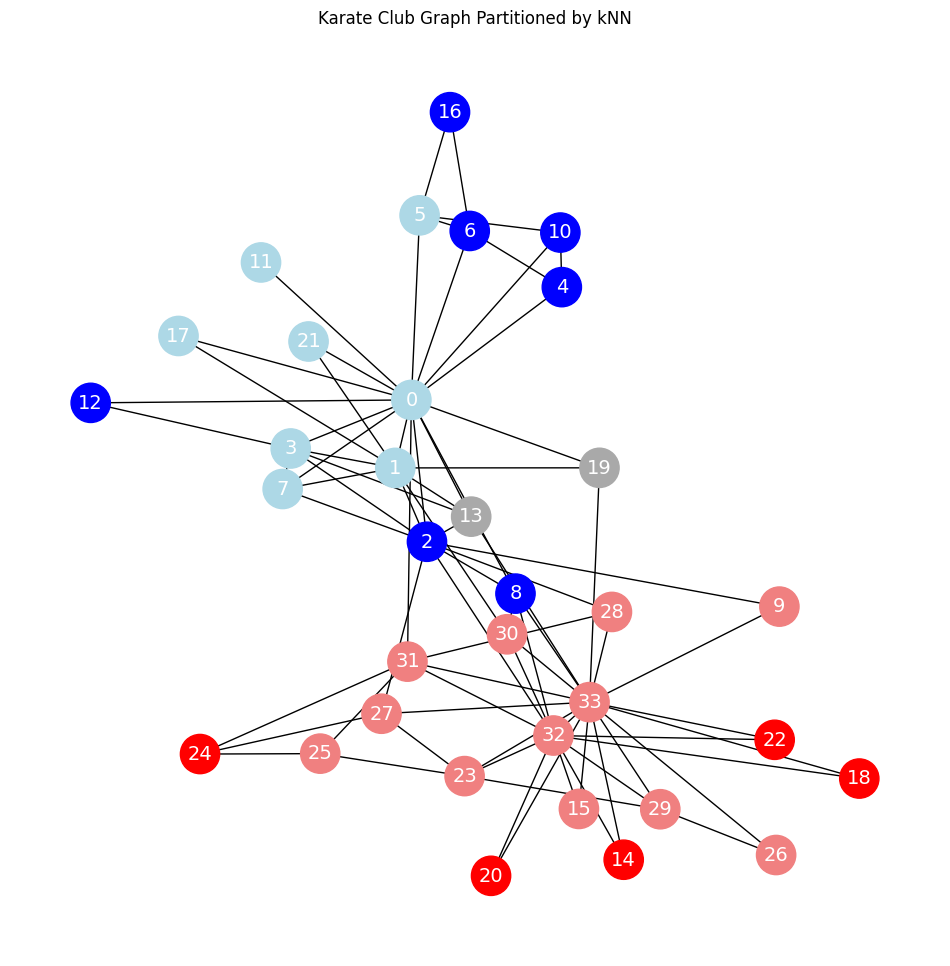

In [12]:
# Example usage  
plot_graph_with_labels(G, true_labels, y_pred, train_mask, test_mask, "Karate Club Graph Partitioned by kNN")

# **Deep Walk**

Now, we use random walks to generate node features as sentences in word embedding and then use word2vec for node embedding (Deep Walk).

In [13]:
import random
random.seed(0)

def random_walk(start, length):
    walk = [str(start)]  # starting node
    
    for i in range(length):
        neighbors = [node for node in G.neighbors(start)]
        next_node = np.random.choice(neighbors, 1)[0]
        walk.append(str(next_node))
        start = next_node
    
    return walk

# Create a list of random walks
print(random_walk(0, 3))
print(random_walk(6, 3))

['0', '19', '1', '7']
['6', '5', '6', '5']


In [14]:
# Create a list of random walks
walks = []
for node in G.nodes:
    for _ in range(80):
        walks.append(random_walk(node, 10))

# Print the first random walk
print(walks[0])

['0', '3', '2', '32', '22', '33', '14', '33', '31', '28', '31']


In [15]:
from gensim.models.word2vec import Word2Vec 
# Create Word2Vec
model = Word2Vec(walks,
                 hs=1,   # Hierarchical softmax
                 sg=1,   # Skip-gram
                 vector_size=50,
                 window=10,
                 workers=1,
                 seed=1)

print(f'Shape of embedding matrix: {model.wv.vectors.shape}')

Shape of embedding matrix: (34, 50)


In [16]:
# Build vocabulary
model.build_vocab(walks)

# Train model
model.train(walks, total_examples=model.corpus_count, epochs=30)

(187469, 897600)

In [17]:
# Save the model using Gensim's save method
model.save('word2vec_model.model')

In [18]:
# Most similar nodes
print('Nodes that are the most similar to node 0:')
for similarity in model.wv.most_similar(positive=['0']):
    print(f'   {similarity}')

# Similarity between two nodes
print(f"\nSimilarity between node 0 and 4: {model.wv.similarity('0', '4')}")

Nodes that are the most similar to node 0:
   ('10', 0.6763995885848999)
   ('4', 0.6360117197036743)
   ('17', 0.6139618754386902)
   ('1', 0.5767839550971985)
   ('6', 0.5750784277915955)
   ('7', 0.5714203715324402)
   ('5', 0.5569499731063843)
   ('16', 0.5519386529922485)
   ('11', 0.5395870804786682)
   ('21', 0.5301610231399536)

Similarity between node 0 and 4: 0.6360117197036743


## Classification using deep walk embeddings

In [19]:
import numpy as np  
from sklearn.neighbors import NearestNeighbors  
from sklearn.metrics import accuracy_score  

# Extract embeddings from the Word2Vec model for the nodes in the train and test masks 
X_wv = np.array([model.wv[str(node)] for node in G.nodes])
X_train_wv = X_wv[train_mask]
X_test_wv =  X_wv[test_mask]

# Train Nearest Neighbors model  
n_neighbors = 3  
neigh = NearestNeighbors(n_neighbors=n_neighbors)  
neigh.fit(X_train_wv)  

# Find nearest neighbors indices for X_test  
distances, indices = neigh.kneighbors(X_test_wv)  

# Predict labels for test set based on nearest neighbors  
y_pred = np.array([np.bincount(y_train[indices[i]]).argmax() for i in range(len(indices))])  

# Evaluate accuracy  
acc = accuracy_score(y_test, y_pred)  
print(f'Accuracy = {acc * 100:.2f}%')

Accuracy = 95.45%


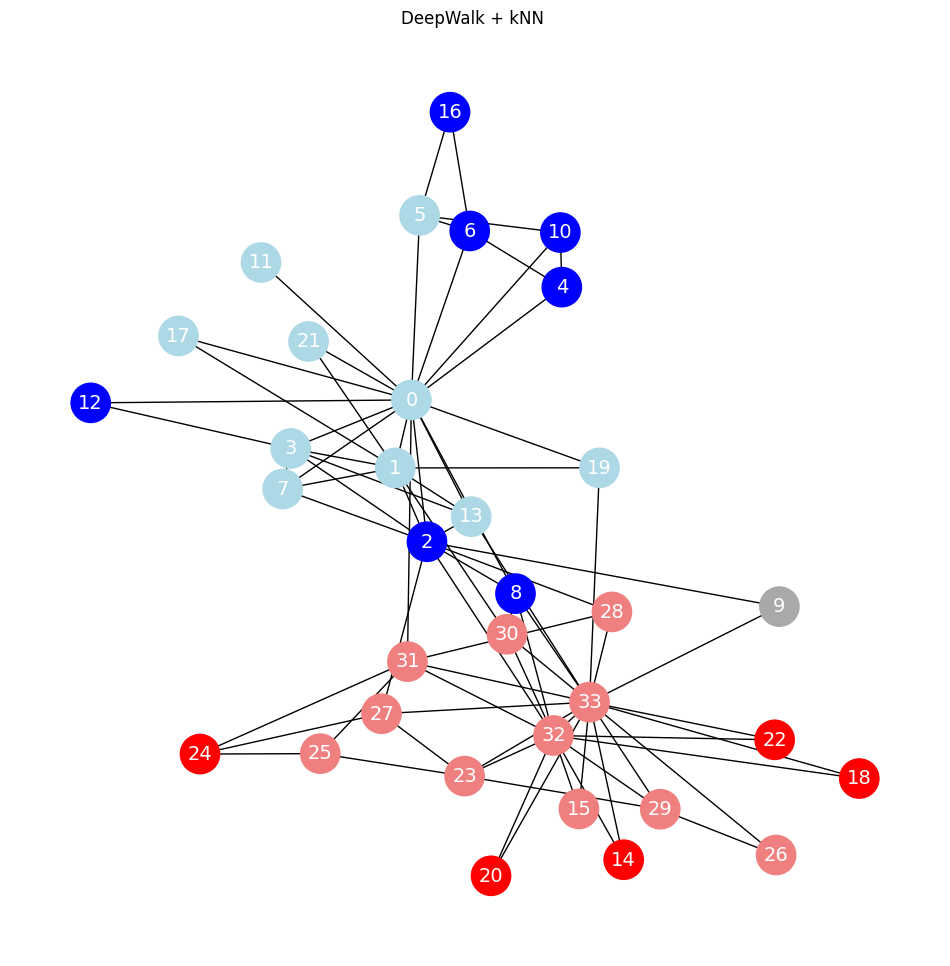

In [20]:
plot_graph_with_labels(G, true_labels, y_pred, train_mask, test_mask, 'DeepWalk + kNN ')

In [21]:
np.set_printoptions(precision=2)
model.wv['0']

array([-0.06,  0.17,  0.06,  0.04,  0.05, -0.06,  0.04,  0.08, -0.32,
        0.18, -0.01, -0.01,  0.24,  0.04,  0.14,  0.01,  0.15,  0.52,
       -0.45, -0.13,  0.12,  0.07,  0.13, -0.3 ,  0.05, -0.08,  0.27,
        0.09, -0.27, -0.06, -0.39, -0.4 ,  0.29, -0.29, -0.04, -0.04,
        0.37, -0.13, -0.12,  0.04, -0.22,  0.13, -0.1 ,  0.31,  0.23,
        0.1 , -0.09,  0.04,  0.09,  0.26], dtype=float32)

In [22]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score

# # Train classifier
# clf = RandomForestClassifier(random_state=0)
# clf.fit(X_train, y_train)

# # Evaluate accuracy
# y_pred = clf.predict(X_test)
# acc = accuracy_score(y_test, y_pred)
# print(f'Accuracy (w/o embeddings) = {acc*100:.2f}%')

# clf.fit(X_train_emb, y_train)
# y_pred = clf.predict(X_test_emb)
# acc_emb = accuracy_score(y_test, y_pred)

# print(f'Accuracy (w/o embeddings) = {acc_emb*100:.2f}%')

# Clustering

## adjacency matrix

The adjacency matrix is used as the features' matrix.

[[0. 4. 5. ... 2. 0. 0.]
 [4. 0. 6. ... 0. 0. 0.]
 [5. 6. 0. ... 0. 2. 0.]
 ...
 [2. 0. 0. ... 0. 4. 4.]
 [0. 0. 2. ... 4. 0. 5.]
 [0. 0. 0. ... 4. 5. 0.]]


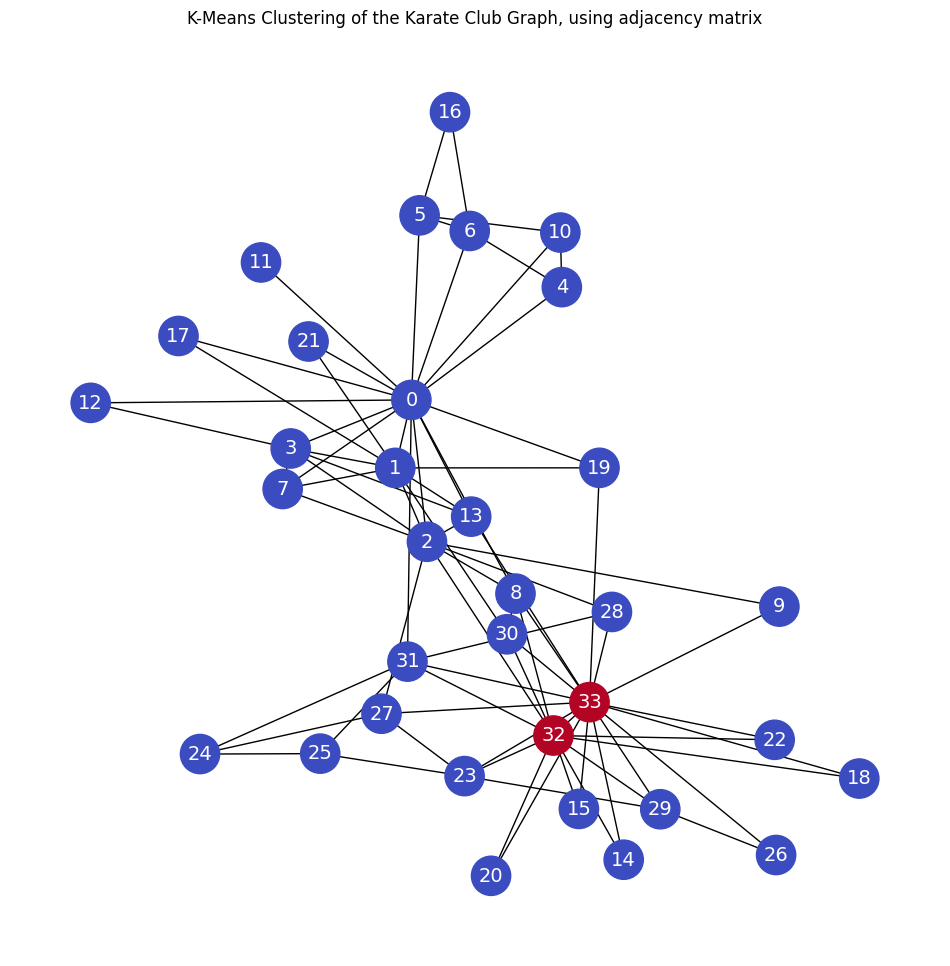

In [23]:
from sklearn.cluster import KMeans  

# Obtain features from the adjacency matrix (or use a different method for features)
X = nx.to_numpy_array(G)
print(X)
# Apply k-means clustering (let's choose 2 clusters for the Karate club graph)
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)

# Plot graph with clusters
plt.figure(figsize=(12, 12))
plt.axis('off')
nx.draw_networkx(G,
                 pos=nx.spring_layout(G, seed=0),
                 node_color=labels,
                 node_size=800,
                 cmap='coolwarm',
                 font_size=14,
                 font_color='white'
                 )
plt.title('K-Means Clustering of the Karate Club Graph, using adjacency matrix')
plt.show()


## Node Degrees

Clustering the nodes with k-means. The node degrees are used as the node features.

[16  9 10  6  3  4  4  4  5  2  3  1  2  5  2  2  2  2  2  3  2  2  2  5
  3  3  2  4  3  4  4  6 12 17]


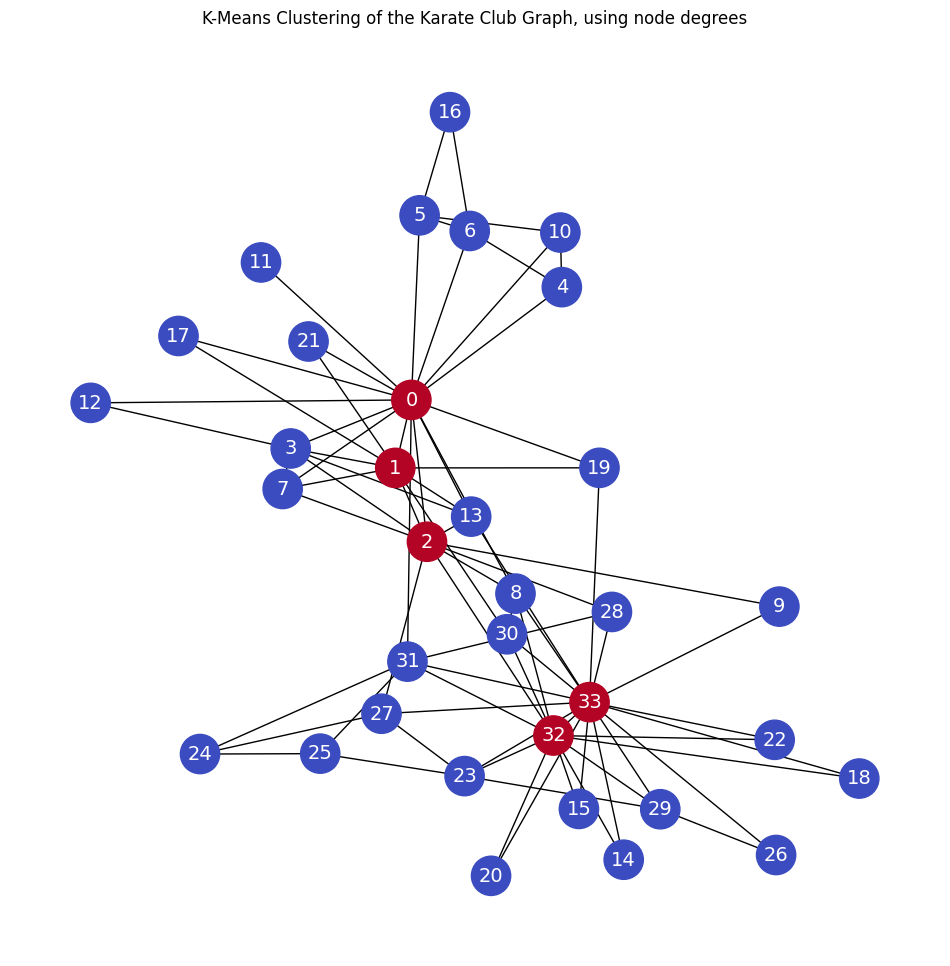

In [24]:
from sklearn.cluster import KMeans

# Extract node features (node degrees)  
X = np.array([dict(G.degree())[node] for node in G.nodes])  
print(X)
# Apply K-means clustering  
n_clusters = 2  # Number of clusters  
kmeans = KMeans(n_clusters=n_clusters, random_state=0)  
labels = kmeans.fit_predict(X.reshape(-1, 1))  

# Plot graph with clusters
plt.figure(figsize=(12, 12))
plt.axis('off')
nx.draw_networkx(G,
                 pos=nx.spring_layout(G, seed=0),
                 node_color=labels,
                 node_size=800,
                 cmap='coolwarm',
                 font_size=14,
                 font_color='white'
                 )
plt.title('K-Means Clustering of the Karate Club Graph, using node degrees')
plt.show()

## Deepwalk embeddings

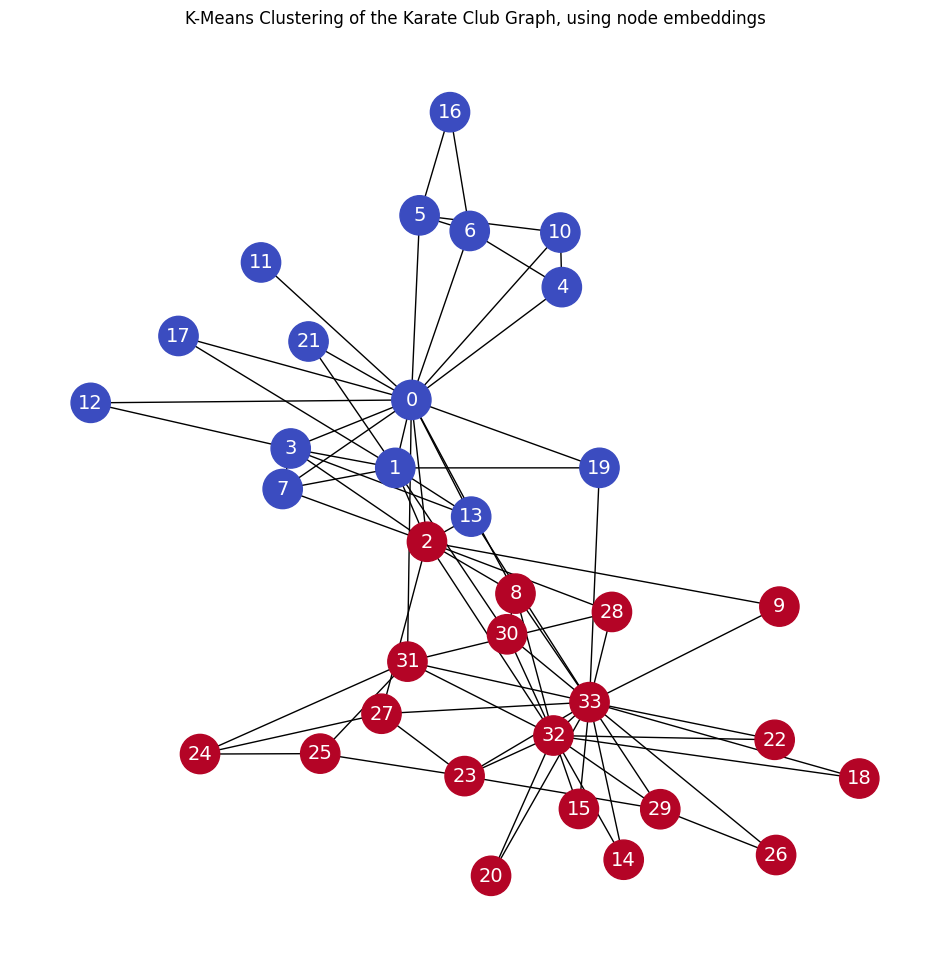

In [25]:
from sklearn.cluster import KMeans

# Apply K-means clustering  
n_clusters = 2  # Number of clusters  
kmeans = KMeans(n_clusters=n_clusters, random_state=42)  
labels = kmeans.fit_predict(X_wv)  

# Plot graph with clusters
plt.figure(figsize=(12, 12))
plt.axis('off')
nx.draw_networkx(G,
                 pos=nx.spring_layout(G, seed=0),
                 node_color=labels,
                 node_size=800,
                 cmap='coolwarm',
                 font_size=14,
                 font_color='white'
                 )
plt.title('K-Means Clustering of the Karate Club Graph, using node embeddings')
plt.show()

> **Note that the above result was achieved without any node features!**

# The overall framework of deepwalk

![](img/Xu2020UnderstandingGE-rw_emb_pipeline2.png)

Source: [Understanding Graph Embedding Methods and Their Applications](https://epubs.siam.org/doi/10.1137/20M1386062). By: M. Xu.

## Visualizing node embeddings in 2 dimensions

For an introduction to PCA, see the [Foundations of Data Science Course at FUM](https://fum-cs.github.io/fds).

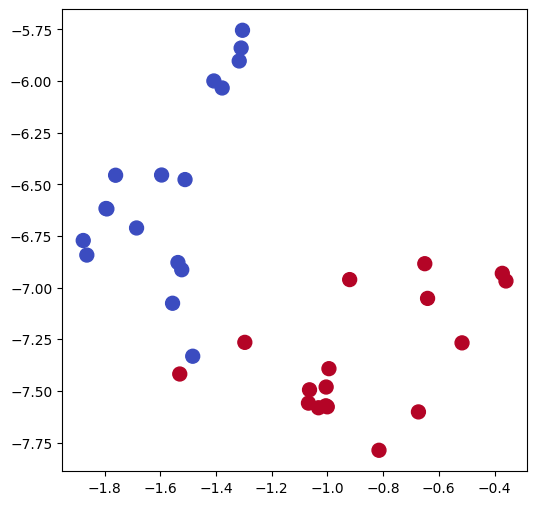

In [26]:
from sklearn.manifold import TSNE

# Preprocess word vectors and label
# nodes_wv = np.array([model.wv.get_vector(str(i)) for i in range(len(model.wv))])
# node_embeddings = np.array([model.wv[str(node)] for node in G.nodes])

labels = np.array(true_labels)

# Train TSNE
tsne = TSNE(n_components=2,
            learning_rate='auto',
            init='pca',
            random_state=0).fit_transform(X_wv)

# Plot TSNE
plt.figure(figsize=(6, 6))
plt.scatter(tsne[:, 0], tsne[:, 1], s=100, c=labels, cmap="coolwarm")
plt.show()

For an introduction to K-means clustering, see the [Data Minig Course at FUM](https://fum-cs.github.io/cs-bsc-dm/)